# Apple Workouts - Daily Workout Duration vs. Calories Consumed Analysis Notebook


> This notebook retrieves total apple workout duration and total calories consumed for each day in a given period, to help determine the optimal amount of exercise for weight loss.

This uses the `fulcra-api-python` module, which is available on GitHub
at [https://github.com/fulcradynamics/fulcra-api-python](https://github.com/fulcradynamics/fulcra-api-python).


In [39]:
%pip install -qU fulcra-api




In [1]:
from fulcra_api.core import FulcraAPI
import seaborn as sns

fulcra = FulcraAPI()

## Logging in to Fulcra

To make calls to the API, call `authorize()` first.  You authorize the `FulcraAPI`
instance using your browser.  The `authorize()` function will generate a link below
that you should click to log in to Fulcra.  (Depending on the notebook front-end
you're using, this tab may open automatically. On Colaboratory and other hosted
solutions, pop-up blockers usually prevent this from happening.)

Once you've logged in, close the tab; you should see "Authorization succeeded"
displayed in the notebook output.  


In [2]:
fulcra.authorize()

## Setting the Time Frame
Adjust start_date and end_date to define the timeframe for which data is to be retrieved

In [51]:
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)


## Retrieving Workout Data

Once your `FulcraAPI` instance is authorized, you can now use it
to make API calls.

The `metric_time_series` function is used to create a Pandas dataframe.

In [52]:
import pandas as pd
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed

# Function to fetch Apple Workout data for a single day
def fetch_data_for_day(day):
    try:
        start_time = day.isoformat() + "Z"
        end_time = (day + timedelta(days=1)).isoformat() + "Z"

        workouts = fulcra.apple_workouts(
            start_time=start_time,
            end_time=end_time
        )

        # Convert the workouts data to a DataFrame
        df = pd.DataFrame(workouts)

        # Add a new column 'workout_date' to the DataFrame
        df['workout_date'] = day.date()

        return df
    except Exception as e:
        print(f"Error fetching data for {day.date()}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of error


# Assuming 'start_date' and 'end_date' have already been defined as datetime objects in a previous block

# Generate a list of all days in the specified time period
days = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Use ThreadPoolExecutor to make parallel API calls
with ThreadPoolExecutor(max_workers=20) as executor:
    futures = [executor.submit(fetch_data_for_day, day) for day in days]

    # Collect the results as they complete
    dfs = [future.result() for future in as_completed(futures) if future.result() is not None and not future.result().empty]

# Concatenate all dataframes into one
df_workouts = pd.concat(dfs, ignore_index=True)

print(f"Data fetched from {start_date.date()} to {end_date.date()}.")


Data fetched from 2023-01-01 to 2023-12-31.


## Display the Workouts Dataframe

Once the data is retrieved and combined into the dataframe, the following code will display the dataframe for inspection.

In [53]:
from IPython.display import display

# Assuming 'df' is your DataFrame
display(df_workouts)

,start_date,end_date,has_undetermined_duration,apple_workout_id,duration,extras,all_statistics,workout_activities,workout_activity_type,workout_events,source_revision,device,workout_date
0,2023-01-02T13:31:03.043000Z,2023-01-02T14:06:47.624000Z,False,fd303b21-1ce2-45f8-949a-21ad3933d9ee,2144.581603,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': 'FD303B21-1CE2-45F8-949A-21AD3933D9E...,hiking,"[{'type': 'segment', 'extras': {}, 'endDate': ...","{'name': 'Ash’s Apple Watch Ultra', 'version':...","{'name': 'Apple Watch', 'model': 'Watch', 'man...",2023-01-02
1,2023-01-02T16:18:50.531000Z,2023-01-02T17:24:40.612000Z,False,1a0da91f-4dea-42b8-8836-bdd6cca5251a,3950.080433,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '1A0DA91F-4DEA-42B8-8836-BDD6CCA5251...,walking,"[{'type': 'segment', 'extras': {}, 'endDate': ...","{'name': 'Ash’s Apple Watch Ultra', 'version':...","{'name': 'Apple Watch', 'model': 'Watch', 'man...",2023-01-02
2,2023-01-02T20:14:50.020000Z,2023-01-02T20:57:41.365000Z,False,40ecbb8f-dcd8-487b-954b-2c655c30ce4d,2571.345046,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '40ECBB8F-DCD8-487B-954B-2C655C30CE4...,walking,"[{'type': 'segment', 'extras': {}, 'endDate': ...","{'name': 'Ash’s Apple Watch Ultra', 'version':...","{'name': 'Apple Watch', 'model': 'Watch', 'man...",2023-01-02
3,2023-01-04T13:07:36.469000Z,2023-01-04T13:34:05.168000Z,False,293ac56e-2798-40e1-8001-e968475999c7,1588.698966,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '293AC56E-2798-40E1-8001-E968475999C...,walking,"[{'type': 'segment', 'extras': {}, 'endDate': ...","{'name': 'Ash’s Apple Watch Ultra', 'version':...","{'name': 'Apple Watch', 'model': 'Watch', 'man...",2023-01-04
4,2023-01-04T14:56:39.340000Z,2023-01-04T16:04:35.458000Z,False,c53a13e5-9342-4c4d-b74d-ba1b6395e54f,4076.117676,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': 'C53A13E5-9342-4C4D-B74D-BA1B6395E54...,walking,"[{'type': 'segment', 'extras': {}, 'endDate': ...","{'name': 'Ash’s Apple Watch Ultra', 'version':...","{'name': 'Apple Watch', 'model': 'Watch', 'man...",2023-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2023-12-26T16:23:16.350000Z,2023-12-26T18:17:25.396000Z,False,1808fbbc-285f-4fef-9cfc-9d0fc5cce9b3,6849.046085,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '1808FBBC-285F-4FEF-9CFC-9D0FC5CCE9B...,walking,"[{'type': 'segment', 'extras': {}, 'endDate': ...","{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man...",2023-12-26
1258,2023-12-29T09:32:00.867000Z,2023-12-29T11:22:28.425000Z,False,b9c4dcf8-4e9e-4724-b794-5c8c736aeda8,6627.557816,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': 'B9C4DCF8-4E9E-4724-B794-5C8C736AEDA...,fitnessGaming,[],"{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man...",2023-12-29
1259,2023-12-29T11:40:07.692000Z,2023-12-29T12:16:55.253000Z,False,f869e73c-2e10-472c-b1b6-e4c72e57191c,2207.561163,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': 'F869E73C-2E10-472C-B1B6-E4C72E57191...,traditionalStrengthTraining,[],"{'name': 'Ash’s Apple Watch', 'version': '10.2...","{'name': 'Apple Watch', 'model': 'Watch', 'man...",2023-12-29
1260,2023-12-29T12:17:04.787000Z,2023-12-29T13:03:24.935000Z,False,84d8720d-bb66-47e7-8551-10ae059fd7cd,2780.147790,"{'HKTimeZone': 'America/New_York', 'HKAverageM...",{'HKQuantityTypeIdentifierHeartRate': {'unit':...,[{'uuid': '84D8720D-BB66-47E7-8551-10AE059FD7C...,hiking,"[{'type': 'segment', 'ext

## Create a Datafame with total workout duration for each day in the time period

In [54]:
# Group the original DataFrame by 'workout_date' and sum the 'duration' for each group
df_total_workout_duration = df_workouts.groupby('workout_date')['duration'].sum().reset_index()

# Rename columns for clarity
df_total_duration_per_day.columns = ['workout_date', 'total_workout_duration']

print(df_total_workout_duration)

    workout_date      duration
0     2023-01-01  12432.629451
1     2023-01-02   8666.007082
2     2023-01-03   8824.552647
3     2023-01-04   9217.815819
4     2023-01-05   9226.187640
..           ...           ...
355   2023-12-27  22874.510950
356   2023-12-28  20100.950055
357   2023-12-29  27009.346602
358   2023-12-30  24848.957675
359   2023-12-31  15448.832968

[360 rows x 2 columns]


## Retrieving Calories Consumed Data

The `fulcra.metric_time_series` function is used to create another Pandas dataframe.

In [55]:
import pandas as pd
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed

# Function to fetch data for a single day
def fetch_data_for_day(day):
    try:
        start_time = day.isoformat() + "Z"
        end_time = (day + timedelta(days=1)).isoformat() + "Z"

        # Assuming fulcra.metric_time_series correctly fetches the data as a DataFrame
        df = fulcra.metric_time_series(
            sample_rate=86400,  # Daily sample rate
            start_time=start_time,
            end_time=end_time,
            metric="CaloriesConsumed",
        )

        # If df is not empty, add a date column
        if not df.empty:
            df['date'] = day.date()  # Add a new column with the date

        return df
    except Exception as e:
        print(f"Error fetching data for {day.date()}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of error

# Generate a list of all days in the specified time period
days = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Use ThreadPoolExecutor to make parallel API calls
with ThreadPoolExecutor(max_workers=20) as executor:
    # Submit all the tasks and get future objects
    futures = [executor.submit(fetch_data_for_day, day) for day in days]

    # As each future completes, collect the result
    dfs = [future.result() for future in as_completed(futures) if future.result() is not None and not future.result().empty]

# Concatenate all dataframes into one
df_calories = pd.concat(dfs, ignore_index=True)

print(f"Data fetched from {start_date.date()} to {end_date.date()}.")



Data fetched from 2023-01-01 to 2023-12-31.


## Display the Calories Consumed Dataframe


In [56]:
from IPython.display import display

display(df_calories)

,calories_consumed,date
0,280.000000,2023-01-01
1,236.000000,2023-01-05
2,320.000000,2023-01-06
3,183.699997,2023-01-07
4,500.440002,2023-01-10
...,...,...
360,1006.602000,2023-12-27
361,2175.776667,2023-12-28
362,2370.716000,2023-12-30
363,1143.350000,2023-12-29


## Combine Dataframes
Combine the workout duration and calories consumed dataframes


In [57]:
import pandas as pd

# Convert the 'date' columns to datetime if they are not already
df_calories['date'] = pd.to_datetime(df_calories['date'])
df_total_workout_duration['workout_date'] = pd.to_datetime(df_total_workout_duration['workout_date'])

# Merge the two DataFrames on the date columns
df_combined = pd.merge(df_calories, df_total_workout_duration, left_on='date', right_on='workout_date', how='outer')

# Drop the 'workout_date' column as it's redundant after the merge
df_combined.drop(columns=['workout_date'], inplace=True)

# Rename the 'duration' column to 'workout_duration'
df_combined.rename(columns={'duration': 'workout_duration'}, inplace=True)

# Optionally, sort the DataFrame by the 'date' column
df_combined.sort_values(by='date', inplace=True)

# Ensure the 'date' column comes first
columns_order = ['date'] + [col for col in df_combined.columns if col != 'date']
df_combined = df_combined[columns_order]

# Reset the index of the combined DataFrame
df_combined.reset_index(drop=True, inplace=True)

print(df_combined)


          date  calories_consumed  workout_duration
0   2023-01-01         280.000000      12432.629451
1   2023-01-02         560.000000       8666.007082
2   2023-01-03         450.000000       8824.552647
3   2023-01-04         311.000000       9217.815819
4   2023-01-05         236.000000       9226.187640
..         ...                ...               ...
360 2023-12-27        1006.602000      22874.510950
361 2023-12-28        2175.776667      20100.950055
362 2023-12-29        1143.350000      27009.346602
363 2023-12-30        2370.716000      24848.957675
364 2023-12-31         899.415333      15448.832968

[365 rows x 3 columns]


## Plot Calories Consumed and Workout Duration

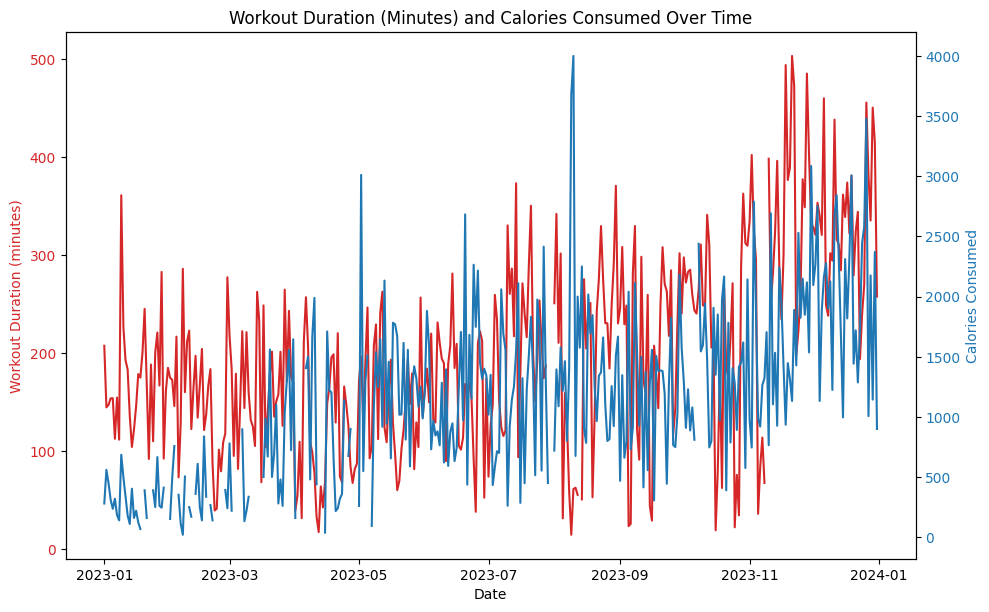

In [58]:
import matplotlib.pyplot as plt

# Convert 'workout_duration' from seconds to minutes if it's not already in minutes
df_combined['workout_duration_minutes'] = df_combined['workout_duration'] / 60

# Ensure the 'date' column is in datetime format (if not already done)
df_combined['date'] = pd.to_datetime(df_combined['date'])
df_combined.set_index('date', inplace=True)

# Create a plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Workout Duration (minutes)', color=color)
ax1.plot(df_combined.index, df_combined['workout_duration_minutes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Calories Consumed', color=color)
ax2.plot(df_combined.index, df_combined['calories_consumed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels don't cut off
plt.title('Workout Duration (Minutes) and Calories Consumed Over Time')
plt.show()
